**Problem1**

In [66]:
#Import libraries
import pandas as mypd
import matplotlib.pyplot as myplot
import seaborn as mysb
import math as mymath
import numpy as mynp
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from pandas.plotting import scatter_matrix
from scipy import stats
from sklearn.metrics import mean_squared_error

In [2]:
#Load data
mydata = mypd.read_excel('CPU_Data.xlsx')

In [3]:
# Check the data
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   MYCT    209 non-null    int64
 1   MMIN    209 non-null    int64
 2   MMAX    209 non-null    int64
 3   CACH    209 non-null    int64
 4   CHMIN   209 non-null    int64
 5   CHMAX   209 non-null    int64
 6   PRP     209 non-null    int64
dtypes: int64(7)
memory usage: 11.6 KB


We see that there is no missing value in the dataset.
Also there are total 209 observations in the dataset.

In [4]:
#Explore the data
mydata.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
0,125,256,6000,256,16,128,198
1,29,8000,32000,32,8,32,269
2,29,8000,32000,32,8,32,220
3,29,8000,32000,32,8,32,172
4,29,8000,16000,32,8,16,132


We see that Features are\
MYCT,	MMIN,	MMAX,	CACH,	CHMIN,	CHMAX\
Response variable is PRP\
We also see that all the variables are continuous variables.

**a. Provide a descriptive summary of fields in the dataset**

In [5]:
#Descriptive summary of the data
mydata.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000


**Separate the variables**

In [6]:
#Variable Seaparation
MYCT = mydata.MYCT
MMIN = mydata.MMIN
MMAX = mydata.MMAX
CACH = mydata.CACH
CHMIN = mydata.CHMIN
CHMAX = mydata.CHMAX
PRP = mydata.PRP

## Explore the variables

**MYCT**

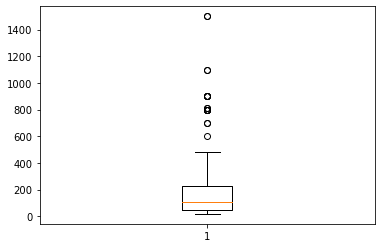

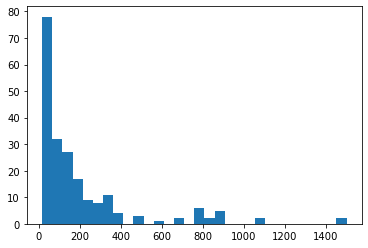

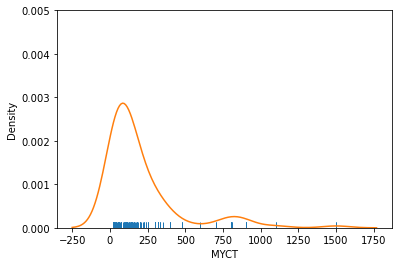

In [7]:
#Box plot
myplot.boxplot(x=MYCT)
myplot.show()
#Histogram
myplot.hist(x=MYCT,bins=30)
myplot.show()
#Rug plot and KDE plot
mysb.rugplot(x=MYCT)
mysb.kdeplot(x=MYCT)
myplot.ylim(0,0.005)
myplot.show()


We find that most of the data are between 0 and 250\
We find that there are some outliers in the data at higher value of MYCT.

**MMIN**

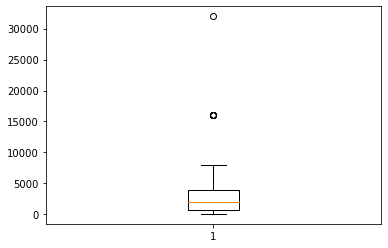

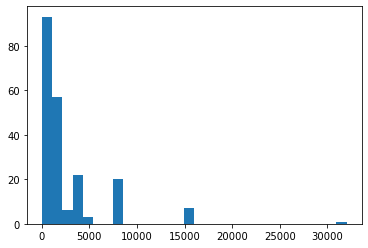

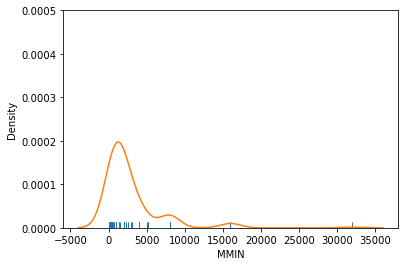

In [8]:
#Box plot
myplot.boxplot(x=MMIN)
myplot.show()
#Histogram
myplot.hist(x=MMIN,bins=30)
myplot.show()
#Rug plot and KDE plot
mysb.rugplot(x=MMIN)
mysb.kdeplot(x=MMIN)
myplot.ylim(0,0.0005)
myplot.show()

We find that most of the data are between 0 and 5000\
We find that there are some outliers in the data at higher value of MMIN.

**MMAX**

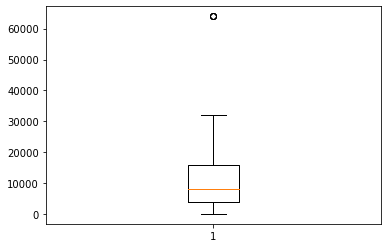

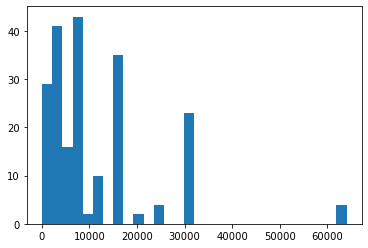

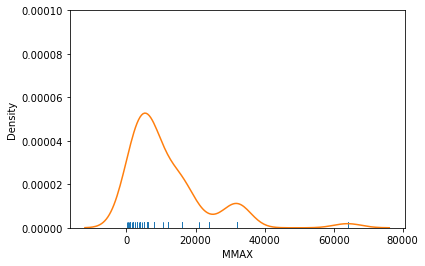

In [9]:
#Box plot
myplot.boxplot(x=MMAX)
myplot.show()
#Histogram
myplot.hist(x=MMAX,bins=30)
myplot.show()
#Rug plot and KDE plot
mysb.rugplot(x=MMAX)
mysb.kdeplot(x=MMAX)
myplot.ylim(0,0.0001)
myplot.show()

We find that there are one outlier is present in the data at higher value of MMAX.

**CACH**

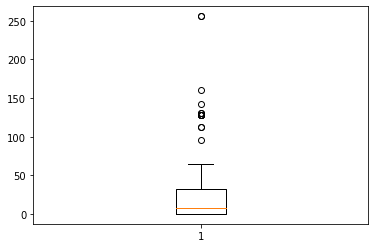

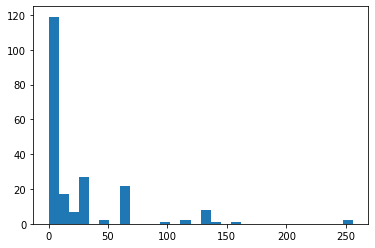

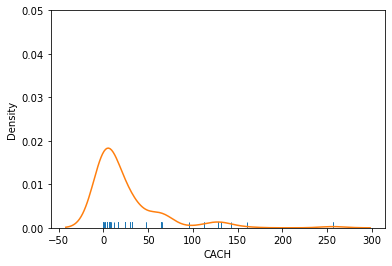

In [10]:
#Box plot
myplot.boxplot(x=CACH)
myplot.show()
#Histogram
myplot.hist(x=CACH,bins=30)
myplot.show()
#Rug plot and KDE plot
mysb.rugplot(x=CACH)
mysb.kdeplot(x=CACH)
myplot.ylim(0,0.05)
myplot.show()

We find that there are some outliers in the data at higher value of CACH.

**CHMIN**

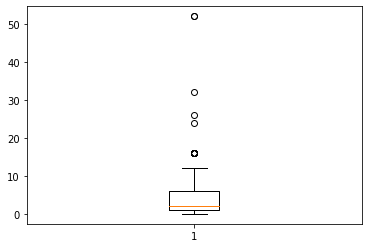

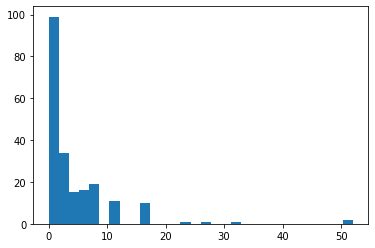

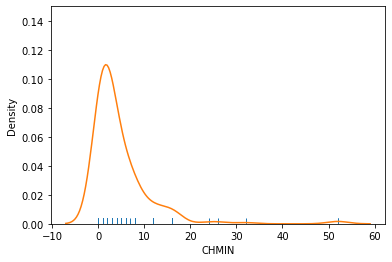

In [11]:
#Box plot
myplot.boxplot(x=CHMIN)
myplot.show()
#Histogram
myplot.hist(x=CHMIN,bins=30)
myplot.show()
#Rug plot & KDE Plot
mysb.rugplot(x=CHMIN)
mysb.kdeplot(CHMIN)
myplot.ylim(0,0.15)
myplot.show()

We find that there are some outliers in the data at higher value of CHMIN.

**CHMAX**

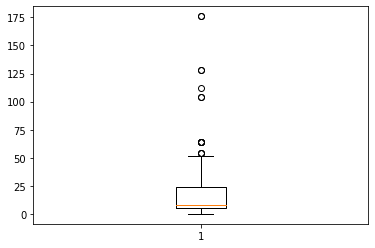

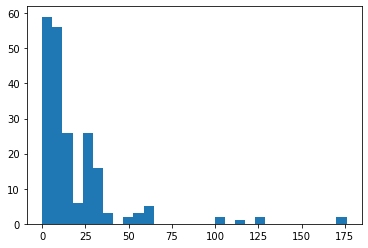

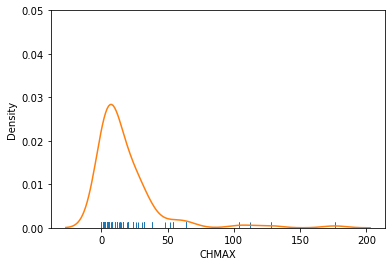

In [12]:
#Box plot
myplot.boxplot(x=CHMAX)
myplot.show()
#Histogram
myplot.hist(x=CHMAX,bins=30)
myplot.show()
#Rug plot & KDE Plot
mysb.rugplot(x=CHMAX)
mysb.kdeplot(CHMAX)
myplot.ylim(0,0.05)
myplot.show()

We find that there are some outliers in the data at higher value of CHMAX.

**PRP**

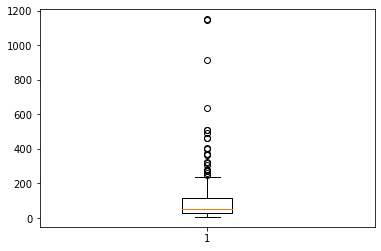

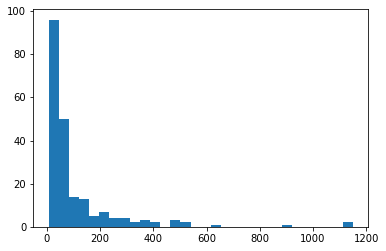

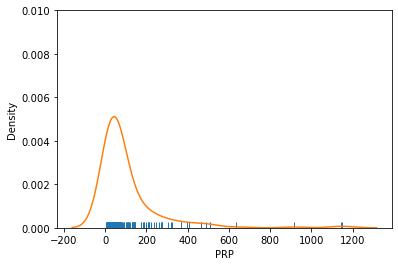

In [13]:
#Box plot
myplot.boxplot(x=PRP)
myplot.show()
#Histogram
myplot.hist(x=PRP,bins=30)
myplot.show()
#Rug plot & KDE Plot
mysb.rugplot(x=PRP)
mysb.kdeplot(PRP)
myplot.ylim(0,0.01)
myplot.show()

**b. Explore the relationship between the response variable PRP and explanatory features using scatter plots and correlation matrix. Give your interpretation of the relationship between response and explanatory features.**

**Pair plot**

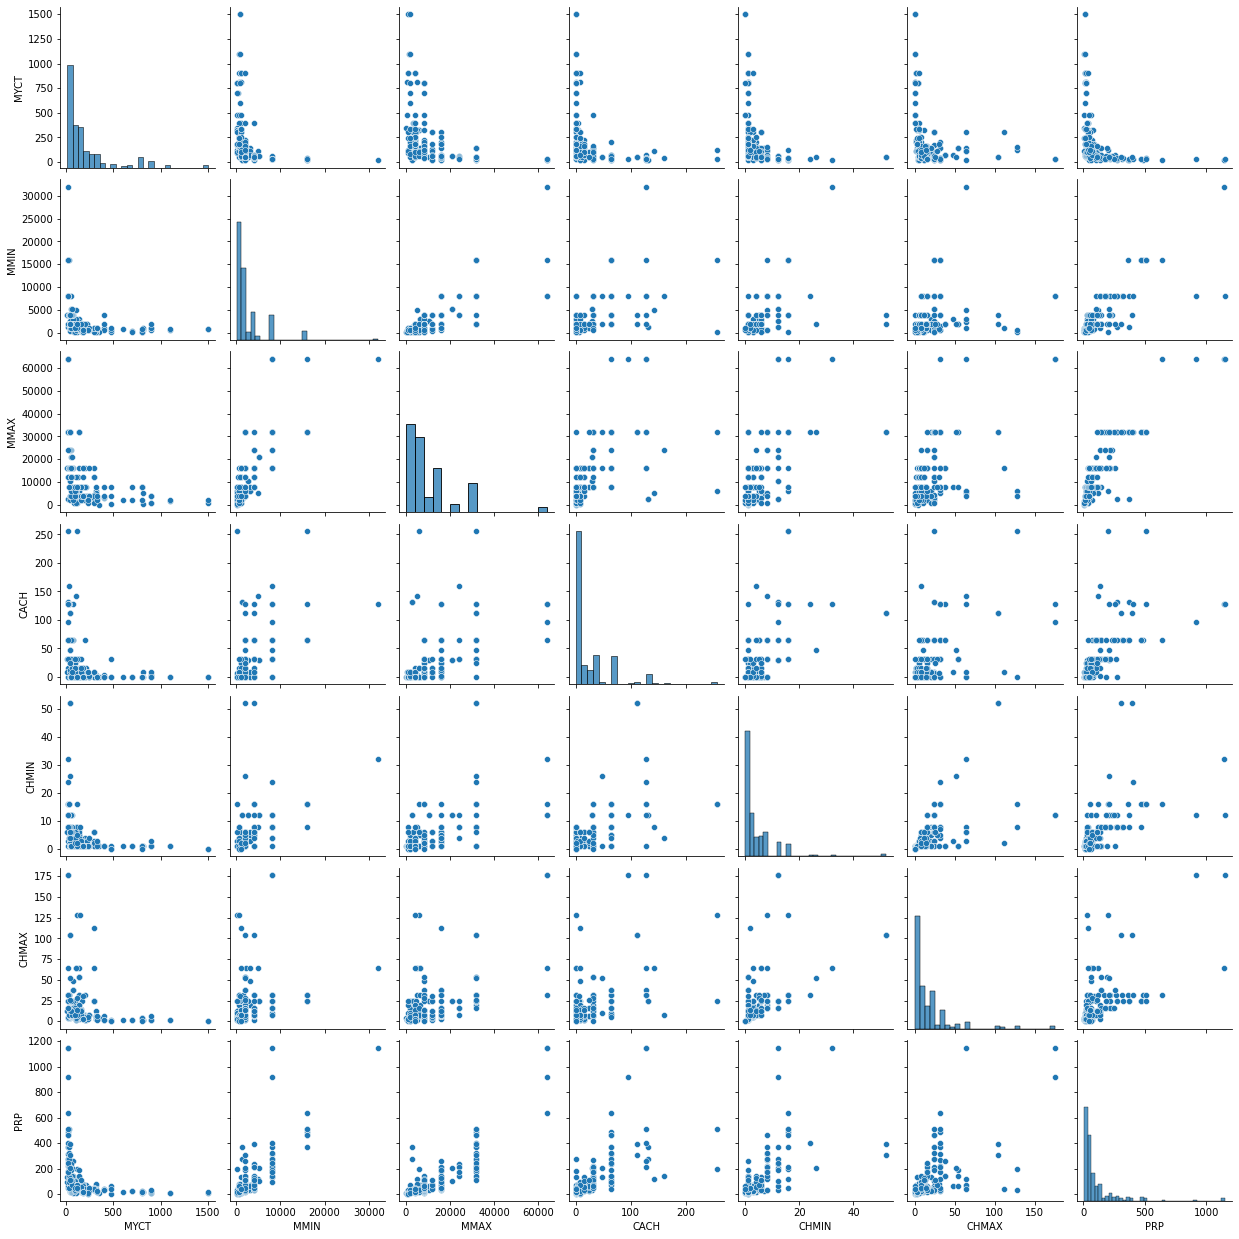

In [14]:
#pair plot
mysb.pairplot(mydata)
myplot.show()

**Correlation matrix**

In [15]:
#Correlation matrix
round(mydata.corr(),2)

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
MYCT,1.00,-0.34,-0.38,-0.32,-0.30,-0.25,-0.31
MMIN,-0.34,1.00,0.76,0.53,0.52,0.27,0.79
MMAX,-0.38,0.76,1.00,0.54,0.56,0.53,0.86
CACH,-0.32,0.53,0.54,1.00,0.58,0.49,0.66
CHMIN,-0.30,0.52,0.56,0.58,1.00,0.55,0.61
CHMAX,-0.25,0.27,0.53,0.49,0.55,1.00,0.61
PRP,-0.31,0.79,0.86,0.66,0.61,0.61,1.00


**Corrlation plot**

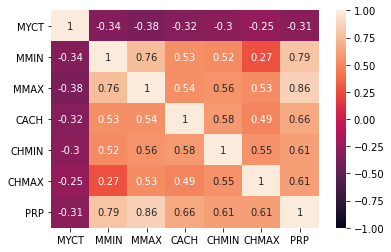

In [16]:
#Correlation plot
mysb.heatmap(data=mydata.corr(),vmin=-1,vmax=1,annot=True)
myplot.show()

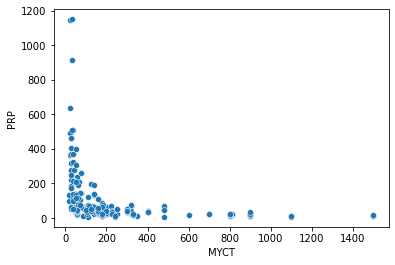

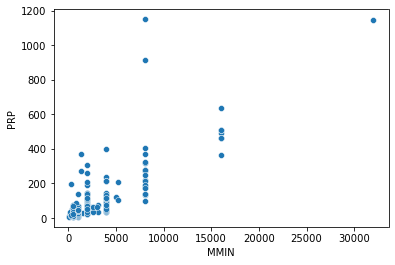

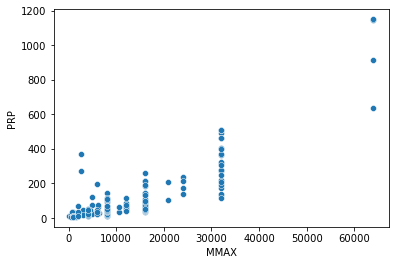

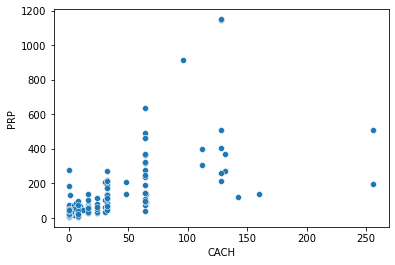

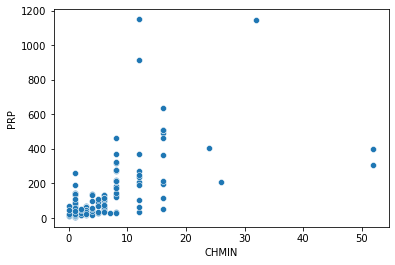

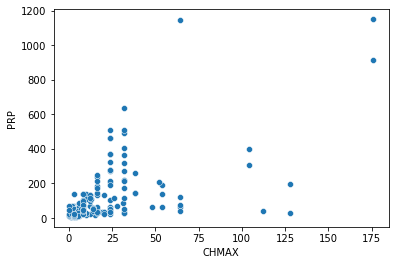

In [17]:
#Individual scatter plots
features = list(mydata.columns)
for i in features[0:(len(features)-1)]:
    mysb.scatterplot(x=mydata[i],y=PRP)
    myplot.show()

We find that the features are not linearly related with the response variable.

**c.	Develop a model to predict the PRP using explanatory features. Provide the model coefficient table and interpret. Are all features have a significant impact on the response? Provide the mathematical expression of your model**

In [18]:
#Develop regression model
mymodel = ols(formula='PRP~MYCT+MMIN+MMAX+CACH+CHMIN+CHMAX',data=mydata).fit()

In [19]:
#Model summary
mymodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PRP   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     215.5
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           6.24e-85
Time:                        20:28:45   Log-Likelihood:                -1148.7
No. Observations:                 209   AIC:                             2311.
Df Residuals:                     202   BIC:                             2335.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -55.8939      8.045     -6.948      0.000     -71.757     -40.031
MYCT           0.0489      0.018      2.789      0.006       0.014       0.083
MMIN           0.0153      0.002      8.371      0.000       0.012       0.019
MMAX           0.0056      0.001      8.681      0.000       0.004       0.007
CACH           0.6414      0.140      4.596      0.000       0.366       0.917
CHMIN         -0.2704      0.856     -0.316      0.752      -1.958       1.417
CHMAX          1.4825      0.220      6.737      0.000       1.049       1.916
==============================================================================
Omnibus:                       99.727   Durbin-Watson:                   1.202
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1140.969
Skew:                           1.495   Prob(JB):                    1.74e-248
Kurtosis:                      14.049   Cond. No.                     3.32e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

P value for the variable CHMIN is >0.05. We remove this feature from the model.

In [20]:
#Develop new regression model
mymodel = ols(formula='PRP~MYCT+MMIN+MMAX+CACH+CHMAX',data=mydata).fit()

In [21]:
#Check the model
mymodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PRP   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     259.7
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           3.86e-86
Time:                        20:28:45   Log-Likelihood:                -1148.7
No. Observations:                 209   AIC:                             2309.
Df Residuals:                     203   BIC:                             2330.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -56.0750      8.007     -7.003      0.000     -71.862     -40.288
MYCT           0.0491      0.017      2.813      0.005       0.015       0.084
MMIN           0.0152      0.002      8.490      0.000       0.012       0.019
MMAX           0.0056      0.001      8.695      0.000       0.004       0.007
CACH           0.6298      0.134      4.687      0.000       0.365       0.895
CHMAX          1.4599      0.208      7.031      0.000       1.050       1.869
==============================================================================
Omnibus:                      102.713   Durbin-Watson:                   1.199
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1197.698
Skew:                           1.550   Prob(JB):                    8.38e-261
Kurtosis:                      14.310   Cond. No.                     3.31e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

---
**comment**
Here R<sup>2</sup> and R<sup>2</sup> <sub>Adj</sub> remains same after removing CHMIN variable. It means CHMIN variable was very least significant.

---

**Model**

`PRP = -56.075 + 0.049*MYCT + 0.0152*MMIN + 0.0056*MMAX + 0.6298*CACH + 1.4599*CHMAX`

**Model significance**

p value of F statistics = 3.86e-86 which is <0.05.So, we can say that model is significant.



**Model Accuracy**

R<sup>2</sup> >0.6

R<sup>2</sup> <sub>Adj</sub>>0.6

So, the model accuaracy is good.

**f.	Comment on model adequacy based on residual analysis and plots. Provide normal probability plot of residuals and normality test result (test statistic and p_value) and comment on the normality of residuals**

In [22]:
# we find the predicted values
predy = mymodel.predict()

In [23]:
#Convert predicted values to dataframe
predy = mypd.DataFrame(data=predy,columns=['Predicted Value'])

In [24]:
#Join the predicted values with the dataset
myresult = mydata.join(predy)

In [25]:
#Check result
myresult.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,Predicted Value
0,125,256,6000,256,16,128,198,335.419091
1,29,8000,32000,32,8,32,269,311.633929
2,29,8000,32000,32,8,32,220,311.633929
3,29,8000,32000,32,8,32,172,311.633929
4,29,8000,16000,32,8,16,132,199.290229


In [28]:
#Calculate the residuals
res = mymodel.resid

In [29]:
#Convert rediduals to dataframe
res = mypd.DataFrame(res,columns=['Residual'])

In [30]:
#Join the residuals with the dataset
myresult = myresult.join(res)

In [31]:
#Check result
myresult.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,Predicted Value,Residual
0,125,256,6000,256,16,128,198,335.419091,-137.419091
1,29,8000,32000,32,8,32,269,311.633929,-42.633929
2,29,8000,32000,32,8,32,220,311.633929,-91.633929
3,29,8000,32000,32,8,32,172,311.633929,-139.633929
4,29,8000,16000,32,8,16,132,199.290229,-67.290229


In [33]:
# We check the normality of the residuals
stats.normaltest(res).pvalue

array([4.9673234e-23])

We find that Residuals are not normally distributed as p value <0.05.

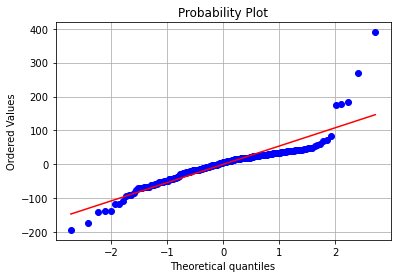

In [37]:
#We plot the Residuals in normal probability plot
stats.probplot(res.Residual,plot=myplot)
myplot.grid()
myplot.show()

We also find that in the q-q plot, points are not falling on the diagonal.

So, we can tell that residuals are not normally distributed.

**Calculate MSE & RMSE**


In [57]:
#MSE
MSE = mean_squared_error(y_true=PRP,y_pred=predy)

3479.805584953484

In [59]:
#RMSE
RMSE = mymath.sqrt(MSE)
round(RMSE,2)

58.99

**g.Provide Residuals versus Predicted values plot and given your interpretation**

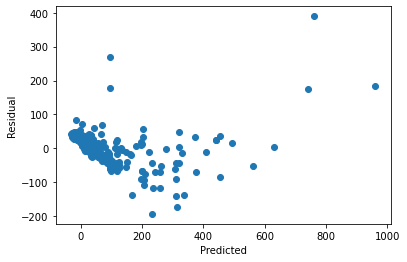

In [41]:
myplot.scatter(x=predy,y=res)
myplot.xlabel('Predicted')
myplot.ylabel('Residual')
myplot.show()

We find that residual vs predicted not uniformly dispersed. So, againg the model is not a good model.

**h.	Perform k fold (k = 10) cross-validation. Provide the mean square error and root mean square error obtained for original data and during cross-validation. Give your comments on model generalizability**

**Model Generalizability**

**Cross Validation**

We build a model with sklearn package for doing cross validation.

In [68]:
#import packages
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [78]:
#Separate x's and y
x =  mydata[['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMAX']]
y =  mydata.iloc[:,6]

In [79]:
#Build model in sklearn
mymodel = LinearRegression().fit(X=x,y=y)

In [81]:
#Cross validation: Model generalizability check
myscore = cross_val_score(estimator=mymodel,X=x,y=y,scoring='neg_mean_squared_error', cv=10)

In [83]:
#Cross validation MSE
CV_MSE = -1*myscore.mean()
round(CV_MSE,3)

6689.4

Cross Validation Residual Sum of Square 

Cross validation MSE * Number of datapoints


In [86]:
#Number of data points
n = mydata.PRP.count()

In [88]:
#Cross Validation Residual Sum of Squares
CV_RSS = CV_MSE*n

In [93]:
#Total Sum of square
Total_SS = PRP.var()*(n-1)

In [94]:
#Cross Validation R square
R_CV = 1 - CV_RSS/Total_SS
round(R_CV,2)

0.74

| | R Square |
| ----------- | ----------- |
| Model |0.865 |
| Cross-Validation | 0.74 |

There is considerable decrease in R sq value after cross validation.
So, the model generalizability is not good.